In [1]:
import os
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import tensorflow as tf
from tensorflow.keras import layers, models

import seaborn as sns
import matplotlib.pyplot as plt

# -----------------------------
# 1) 데이터 불러오기
# -----------------------------

df = pd.read_csv("/content/drive/MyDrive/ml-programming-lab/week5/diabetes.csv")

In [2]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
# Outcome에 어떤 값들이 있는지 확인
print("Outcome 종류:", df['Outcome'].unique())

Outcome 종류: [1 0]


In [4]:
# -----------------------------
# 2) 결측치 확인
# -----------------------------

df.isnull().sum()

# -----------------------------
# 3) 결측치 제거
# -----------------------------

df = df.dropna()
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


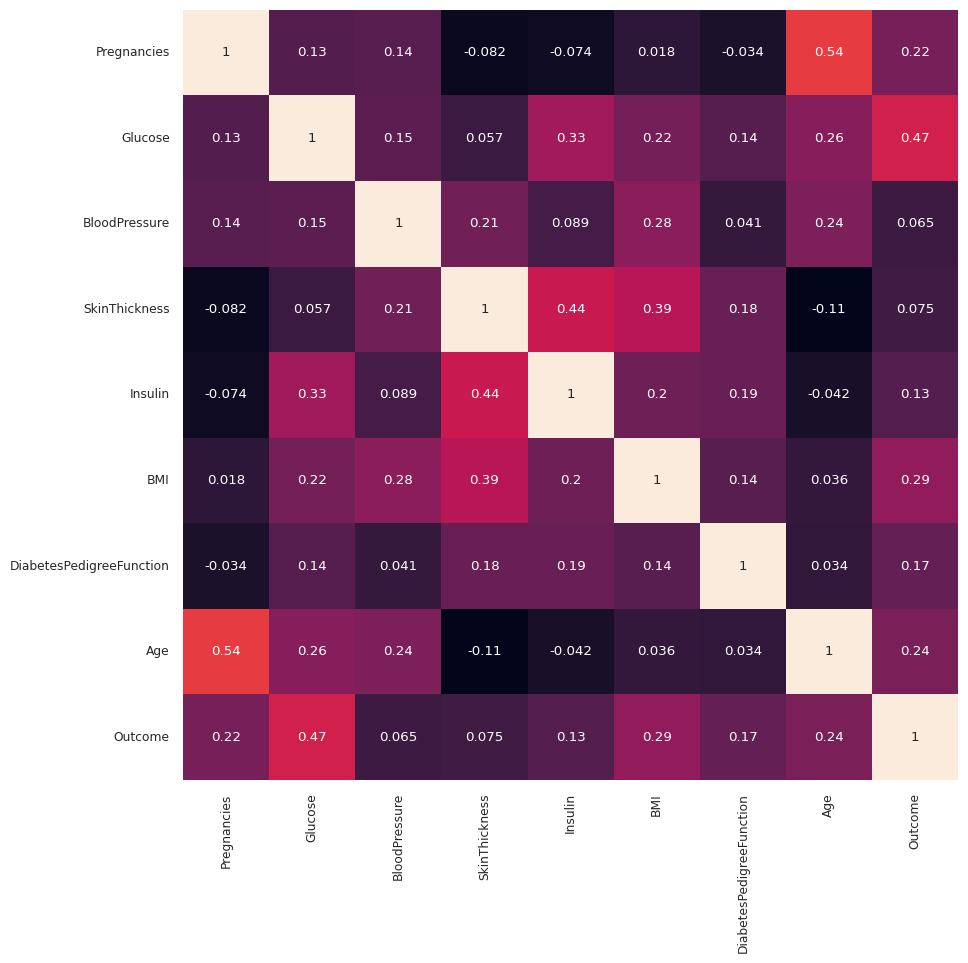

In [5]:
# -----------------------------
# 4) 상관관계 행렬 및 히트맵
# -----------------------------

# 일반적으로 |상관계수| ≥ 0.3 → 상관관계 있음 / |상관계수| ≥ 0.7 → 강한 상관관계

df_corr=df.corr()

plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [6]:
# -----------------------------
# 5) 특징(X)과 타겟(y) 분리
# -----------------------------

# Outcome은 제거, BMI를 타깃으로 예측
X = df.drop(columns=["Outcome", "BMI"])
y = df["BMI"].astype("float32").values   # 타깃(BMI)을 float32 배열로 변환

In [7]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,0.627,50
1,1,85,66,29,0,0.351,31
2,8,183,64,0,0,0.672,32
3,1,89,66,23,94,0.167,21
4,0,137,40,35,168,2.288,33
...,...,...,...,...,...,...,...
763,10,101,76,48,180,0.171,63
764,2,122,70,27,0,0.340,27
765,5,121,72,23,112,0.245,30
766,1,126,60,0,0,0.349,47


In [8]:
y

array([33.6, 26.6, 23.3, 28.1, 43.1, 25.6, 31. , 35.3, 30.5,  0. , 37.6,
       38. , 27.1, 30.1, 25.8, 30. , 45.8, 29.6, 43.3, 34.6, 39.3, 35.4,
       39.8, 29. , 36.6, 31.1, 39.4, 23.2, 22.2, 34.1, 36. , 31.6, 24.8,
       19.9, 27.6, 24. , 33.2, 32.9, 38.2, 37.1, 34. , 40.2, 22.7, 45.4,
       27.4, 42. , 29.7, 28. , 39.1,  0. , 19.4, 24.2, 24.4, 33.7, 34.7,
       23. , 37.7, 46.8, 40.5, 41.5,  0. , 32.9, 25. , 25.4, 32.8, 29. ,
       32.5, 42.7, 19.6, 28.9, 32.9, 28.6, 43.4, 35.1, 32. , 24.7, 32.6,
       37.7, 43.2, 25. , 22.4,  0. , 29.3, 24.6, 48.8, 32.4, 36.6, 38.5,
       37.1, 26.5, 19.1, 32. , 46.7, 23.8, 24.7, 33.9, 31.6, 20.4, 28.7,
       49.7, 39. , 26.1, 22.5, 26.6, 39.6, 28.7, 22.4, 29.5, 34.3, 37.4,
       33.3, 34. , 31.2, 34. , 30.5, 31.2, 34. , 33.7, 28.2, 23.2, 53.2,
       34.2, 33.6, 26.8, 33.3, 55. , 42.9, 33.3, 34.5, 27.9, 29.7, 33.3,
       34.5, 38.3, 21.1, 33.8, 30.8, 28.7, 31.2, 36.9, 21.1, 39.5, 32.5,
       32.4, 32.8,  0. , 32.8, 30.5, 33.7, 27.3, 37

In [9]:
# -----------------------------
# 6) 데이터 스케일링
# -----------------------------

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [10]:
# -----------------------------
# 7) 훈련/테스트 데이터 분리
# -----------------------------

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, shuffle=True
)

In [11]:
# 각 데이터 크기 출력
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((537, 7), (231, 7), (537,), (231,))

In [12]:
# -----------------------------
# 8) 모델 구성
# -----------------------------

model = models.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(64, activation="relu"),
    layers.Dense(1)  # 회귀는 선형 출력
])

In [13]:
# 모델 요약 정보 출력
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,345 (36.50 KB)

 Trainable params: 9,345 (36.50 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# -----------------------------
# 9) 모델 컴파일
# -----------------------------

model.compile(
    optimizer="adam",
    loss="mse",
    metrics = ['mse']
)

In [15]:
# -----------------------------
# 10) 모델 학습
# -----------------------------

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=500,
    batch_size=32,
    verbose=0
)

In [16]:
# -----------------------------
# 11) 모델 예측
# -----------------------------

pred = model.predict(X_test, verbose=0).ravel()

In [17]:
# -----------------------------
# 12) 모델 평가
# -----------------------------

mse  = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
mae  = mean_absolute_error(y_test, pred)
r2   = r2_score(y_test, pred)

model.evaluate(X_test, y_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 59.2078 - mse: 59.2078 


[59.6822624206543, 59.6822624206543]

In [18]:
# -----------------------------
# 13) 모델 성능 출력
# -----------------------------

print("=== MLP - BMI Regression ===")
print(f"Test MSE : {mse:.4f}")
print(f"Test RMSE: {rmse:.4f}")
print(f"Test MAE : {mae:.4f}")
print(f"Test R^2 : {r2:.4f}")

=== MLP - BMI Regression ===
Test MSE : 59.6823
Test RMSE: 7.7254
Test MAE : 5.6479
Test R^2 : 0.1653


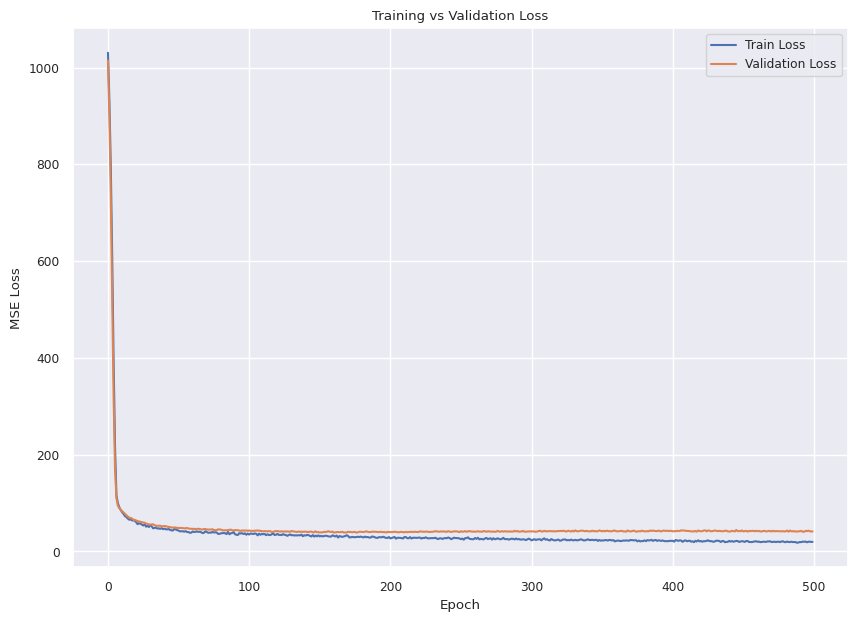

In [19]:
# -----------------------------
# 14) 학습 곡선 (Loss 체크)
# -----------------------------

import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()